## Supervised Learning - Personal Loan Campaign

## Brief Description about the campaign

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

## Column Description of the data provided.
- ID :	Customer ID
- Age:	Customer's age in completed years
- Experience : 	#years of professional experience
- Income :	Annual income of the customer (Dollar-000)
- ZIPCode : 	Home Address ZIP code.
- Family :	Family size of the customer
- CCAvg :	Avg. spending on credit cards per month (Dollar-000)
- Education :	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage :	Value of house mortgage if any. (Dollar-000)
- Personal Loan :	Did this customer accept the personal loan offered in the last campaign?
- Securities Account :	Does the customer have a securities account with the bank?
- CD Account :	Does the customer have a certificate of deposit (CD) account with the bank?
- Online :	Does the customer use internet banking facilities?
- CreditCard :	Does the customer use a credit card issued by UniversalBank?

- Question 1 : Study the data distribution in each attribute, share your findings. (10 points)
- Question 2 : Get the target column distribution.
- Question 3 : Split the data into training and test set in the ratio of 70:30 respectively
- Question 4 : Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)
- Question 5 : Print the confusion matrix for all the above models (10 points)
- Question 6 : Give your reasoning on which is the best model in this case and why it performs better? (10 points)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
pl_df = pd.read_csv('R3_project_download.csv')
print(pl_df.info()) # get info about the dataframe
print("Any blank values present\n", pl_df.isnull().sum()) #check if any blank values is present
missing_values=pl_df.columns[pl_df.isnull().any()]
print("printing missing values column names\n", missing_values)
print("Is any negative value present : ", any(pl_df<0)) # check if any negative values present
print("printing the negative value details\n", pl_df.lt(0).sum()) # print all the columns having negative values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
Any blank values present
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Per

In [3]:
#From the above analysis we can see there are 52 negative values for Experience. Lets see how they look.
print(pl_df[pl_df["Experience"] < 0].head(52))
# Looks like they are wrong entry. Comparing with Age it seems they should be positive instead of -ve
pl_df['Experience'] = pl_df['Experience'].abs()
# we can also drop the rows or make the value to 0. But I have made it positive.
pl_df['ZIP Code'] = pl_df['ZIP Code'].astype(object) # Coverting to categorical as it cannot be considered numeric.
pl_df = pl_df.drop(columns=['ID']) # Dropping the id column

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          

In [4]:
pl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


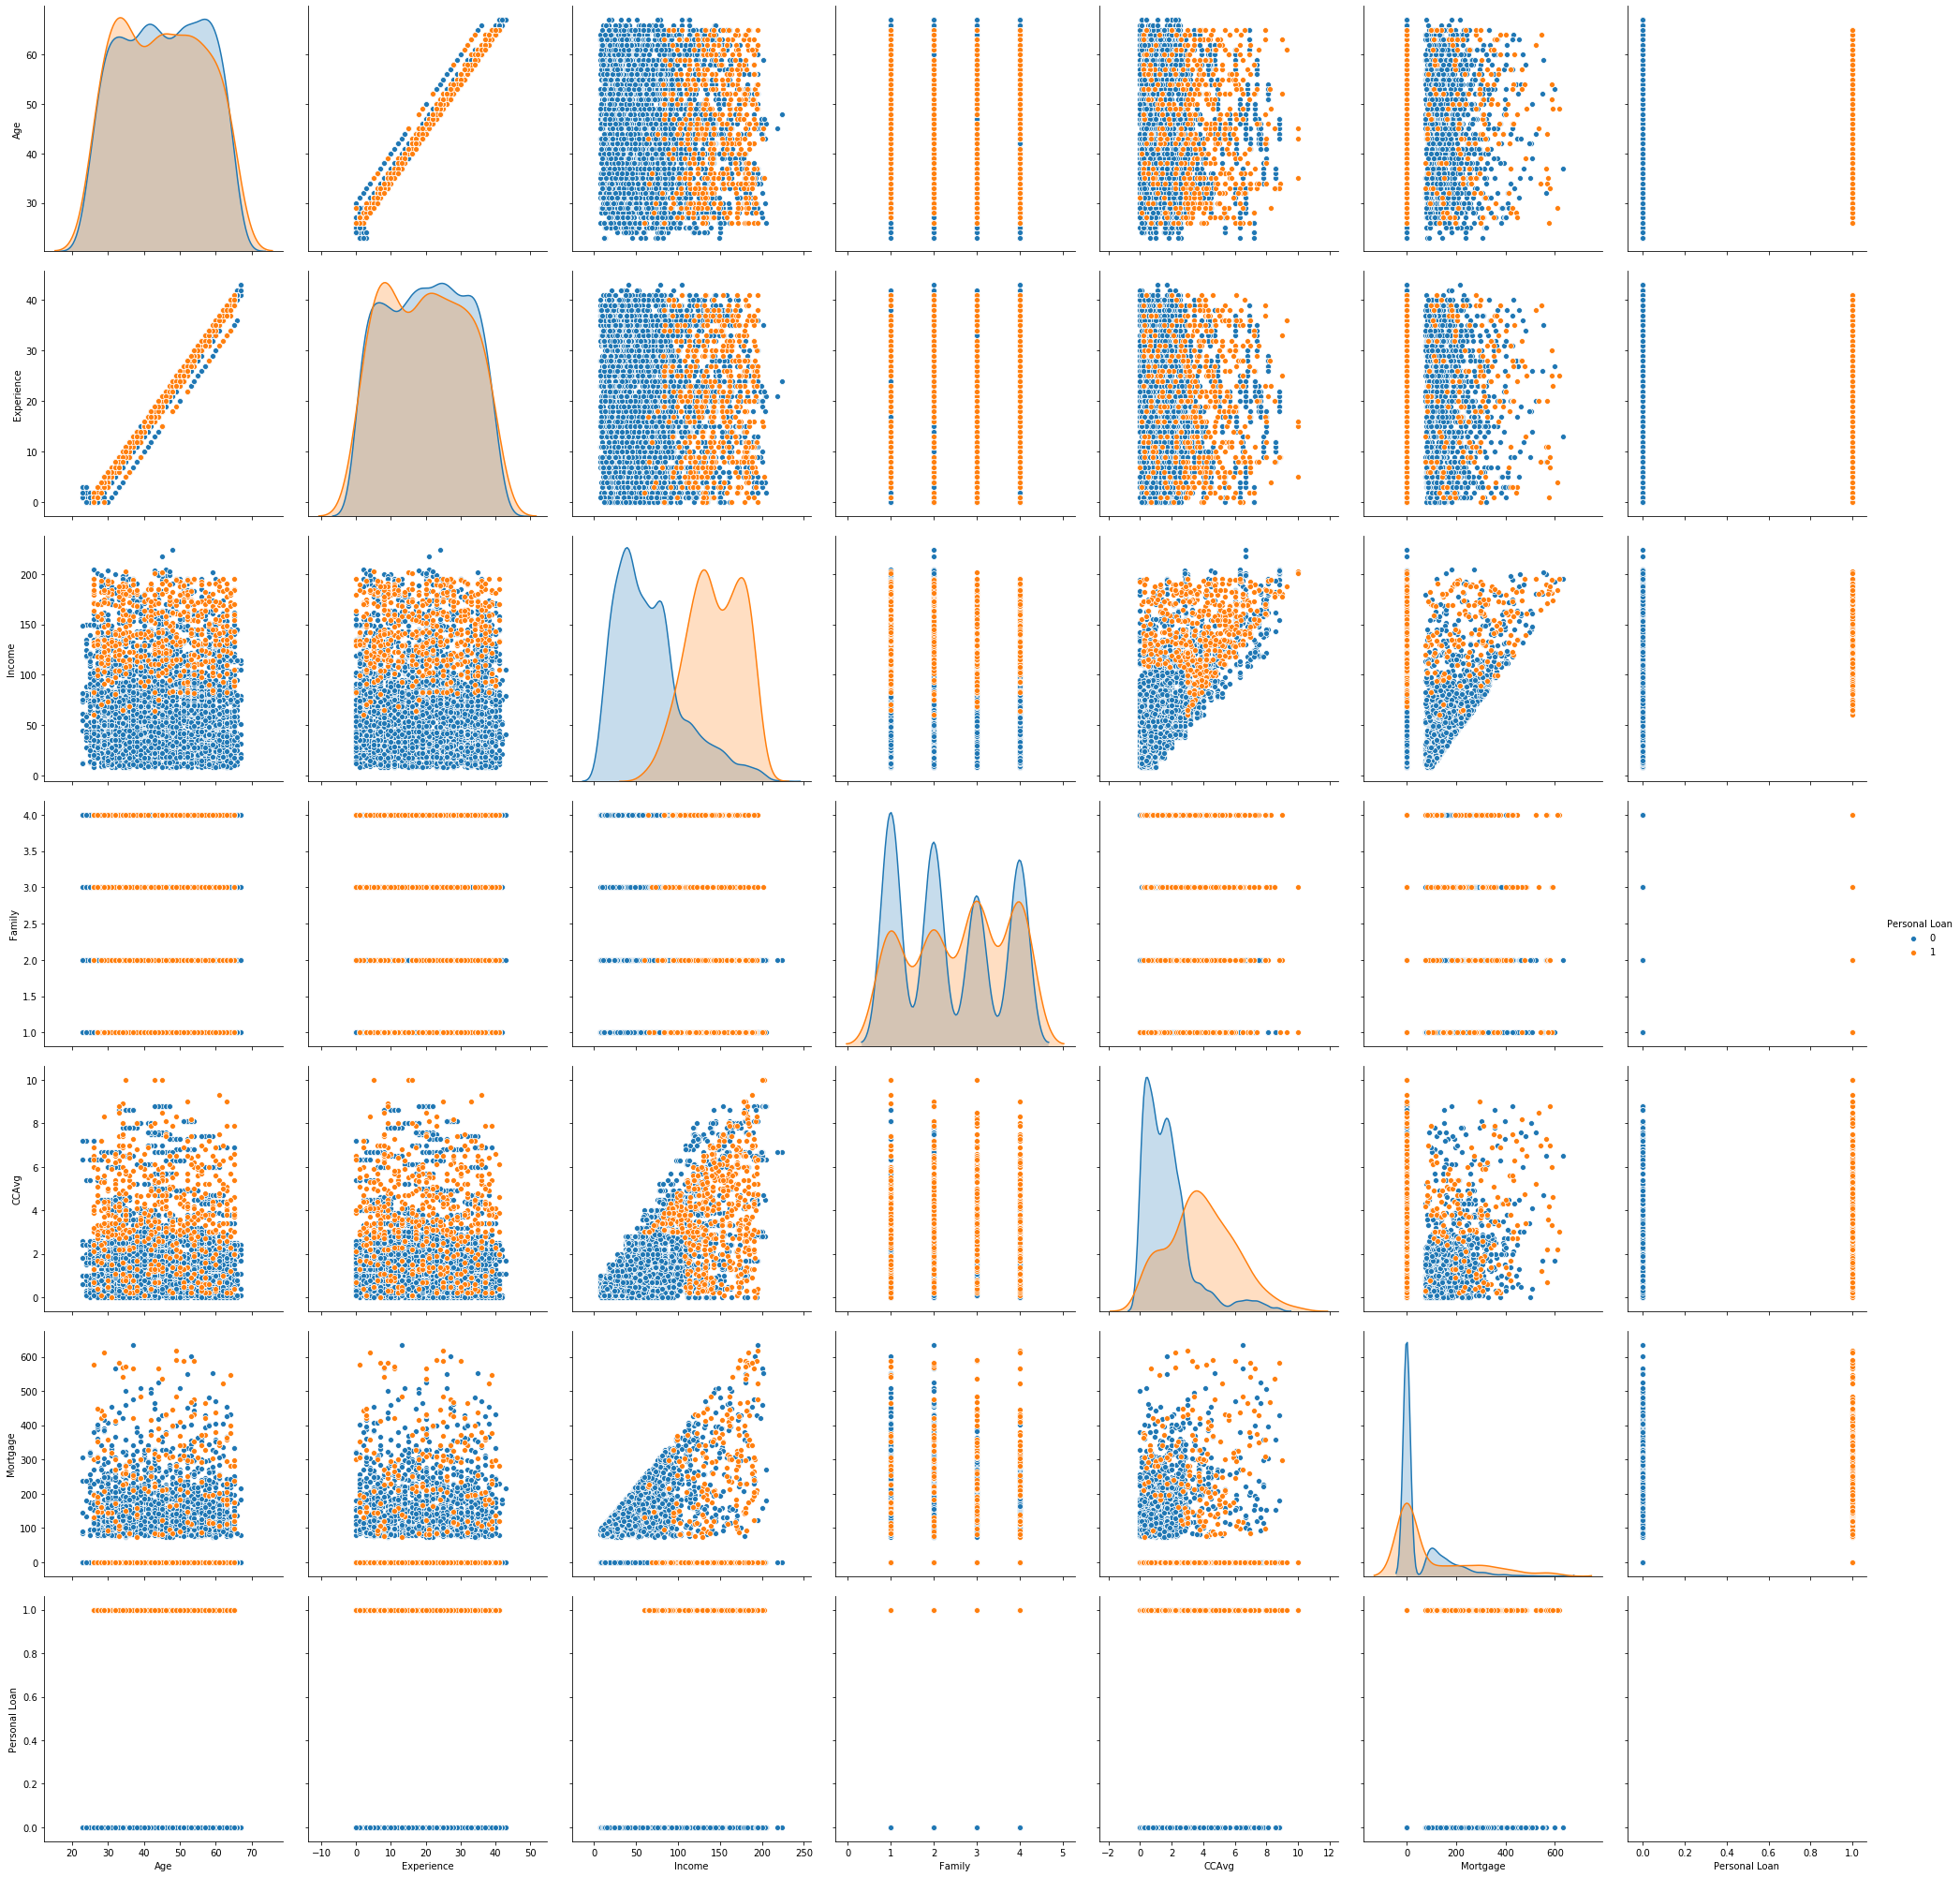

In [5]:
pl_df_numeric = pl_df.drop(columns=['ZIP Code','Education','Securities Account','CD Account','Online','CreditCard'])
sns.pairplot(pl_df_numeric, hue = 'Personal Loan', diag_kind = 'kde', height = 4)

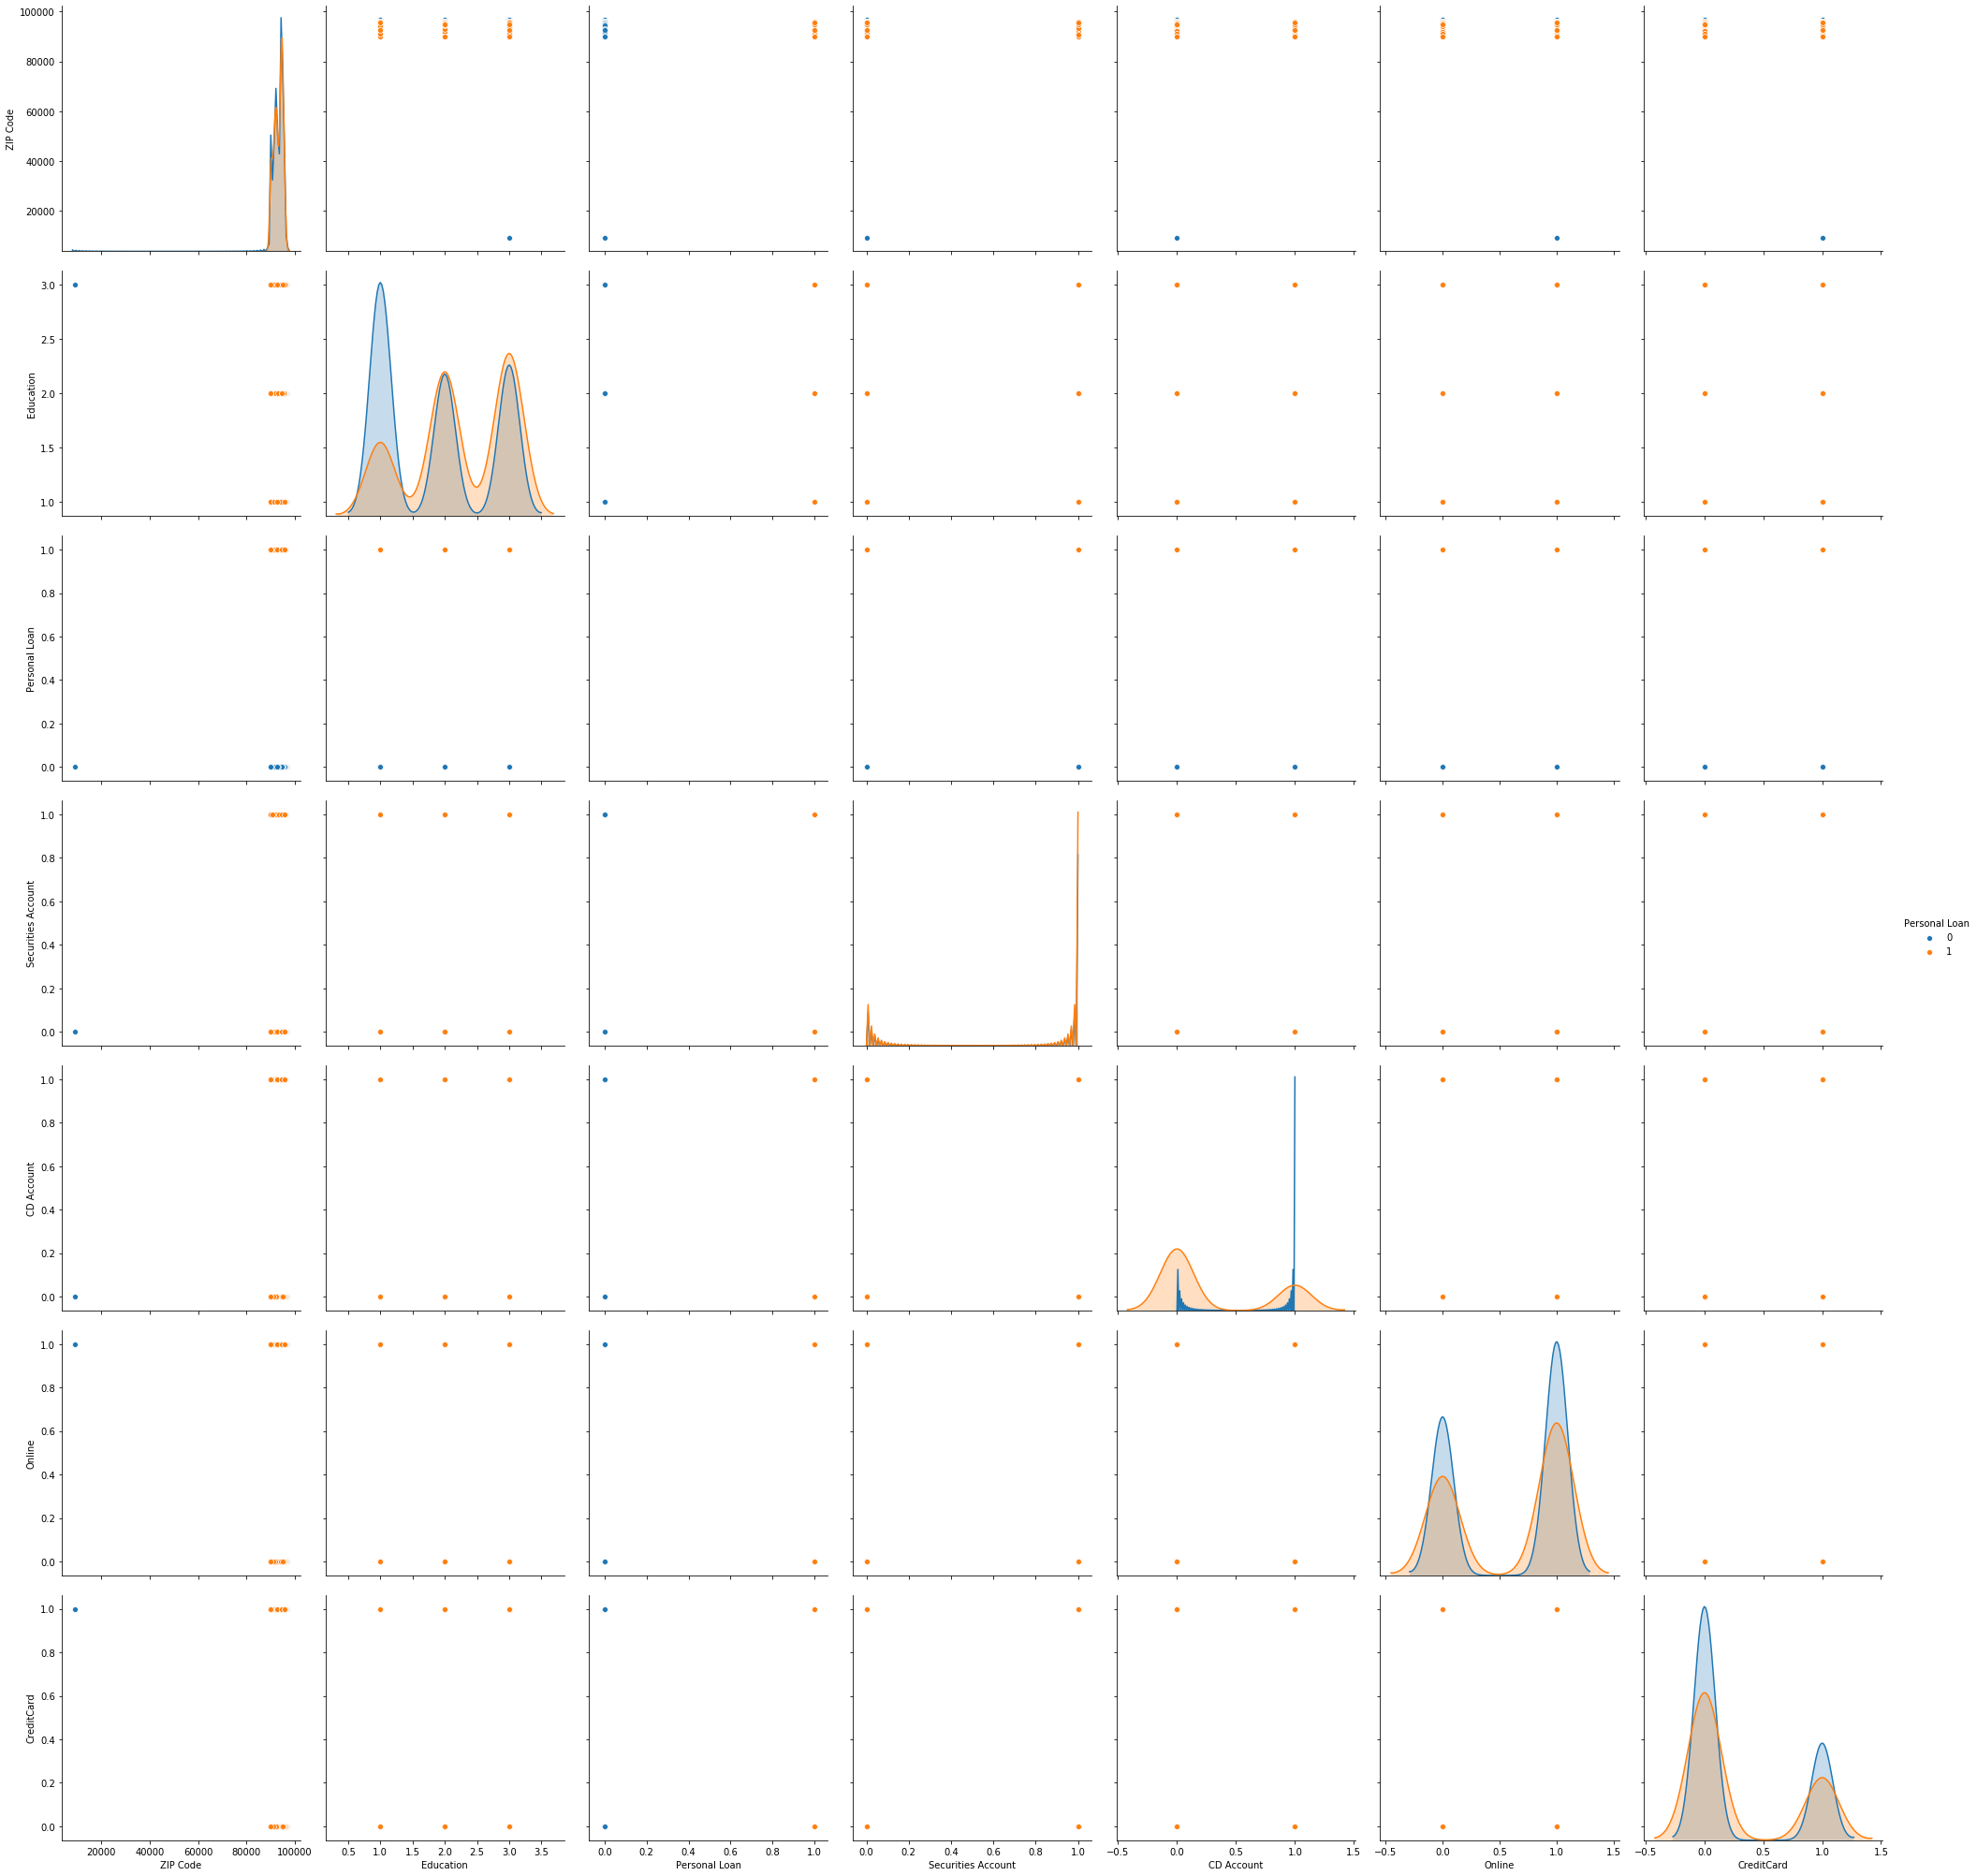

In [6]:
pl_df_categorical = pl_df.drop(columns=['Age','Experience','Income','Family','CCAvg','Mortgage'])
sns.pairplot(pl_df_categorical, hue = 'Personal Loan', diag_kind = 'kde', height = 4)

percentage of people with age 20 to 30 who bought loan 9.89247311827957
percentage of people with age 30 to 40 who bought loan 9.13999228692634
percentage of people with age 40 to 60 who bought loan 10.786106032906764


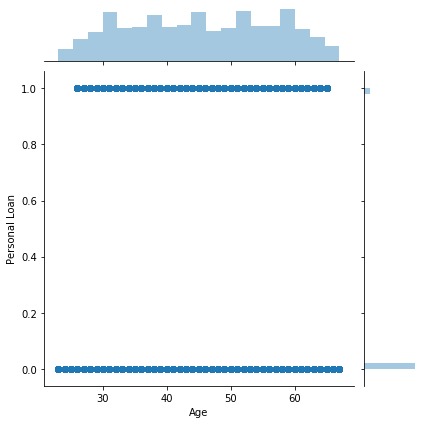

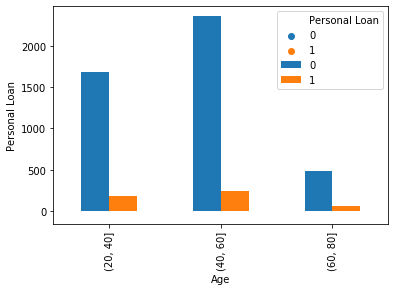

In [7]:
##Analysis of Age Column
df = pl_df.copy(deep=True)
sns.jointplot(y="Personal Loan", x="Age", data=pl_df);
df['age_group'] = pd.cut(x=pl_df['Age'],bins=[0,20,40,60,80])
pd.crosstab(df['age_group'],df['Personal Loan']).plot(kind='bar')

df['age_group'] = df['age_group'].astype('str')
total_20_40 = df.loc[(df['age_group'] == '(20, 40]')].count().unique()[0]
Bought_loan_20_40 = df.loc[(df['age_group'] == '(20, 40]') & (df['Personal Loan'] == 1)].count().unique()[0]
print("percentage of people with age 20 to 30 who bought loan", (Bought_loan_20_40/total_20_40)*100)


total_40_60 = df.loc[(df['age_group'] == '(40, 60]')].count().unique()[0]
Bought_loan_40_60 = df.loc[(df['age_group'] == '(40, 60]') & (df['Personal Loan'] == 1)].count().unique()[0]
print("percentage of people with age 30 to 40 who bought loan", (Bought_loan_40_60/total_40_60)*100)

total_60_80 = df.loc[(df['age_group'] == '(60, 80]')].count().unique()[0]
Bought_loan_60_80 = df.loc[(df['age_group'] == '(60, 80]') & (df['Personal Loan'] == 1)].count().unique()[0]
print("percentage of people with age 40 to 60 who bought loan", (Bought_loan_60_80/total_60_80)*100)

sns.scatterplot(x="Age", y="Personal Loan",data=pl_df, hue='Personal Loan')

### 1. Looks like the Age  column is not a very good predictor  as the percentage of people buying personal irrespective of age group is almost same

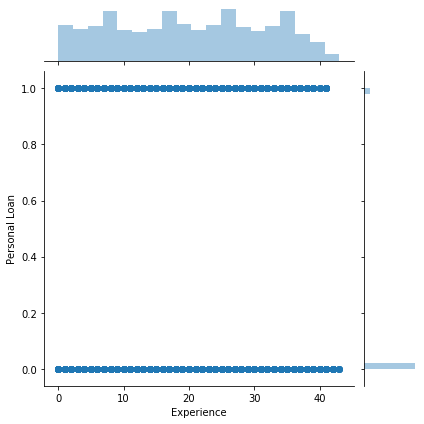

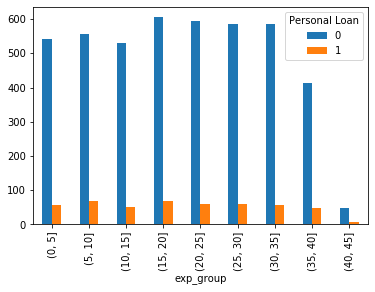

In [8]:
## Analysis of Experience column.
df_exp = pl_df.copy(deep=True)
df_exp['Experience']
sns.jointplot(y="Personal Loan", x="Experience", data=pl_df);
df_exp['exp_group'] = pd.cut(x=pl_df['Experience'],bins=[0,5,10,15,20,25,30,35,40,45,50])
pd.crosstab(df_exp['exp_group'],pl_df['Personal Loan']).plot(kind='bar')
#### Experience may not be a good predictor as the avg of people buying personal loans looks same accross the age groups except the age group of 40-45

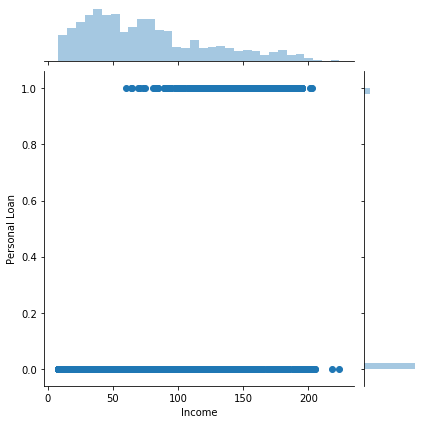

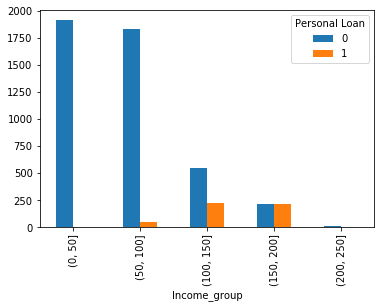

In [9]:
## Analysis of Income Group
df_income = pl_df.copy(deep=True)
sns.jointplot(y="Personal Loan", x='Income', data=pl_df);
df['Income_group'] = pd.cut(x=pl_df['Income'],bins=[0,50,100,150,200,250])
pd.crosstab(df['Income_group'],df['Personal Loan']).plot(kind='bar')
##income is a good predictor as higher the income more people buy personal loan

Text(0, 0.5, 'Proportion of customers')

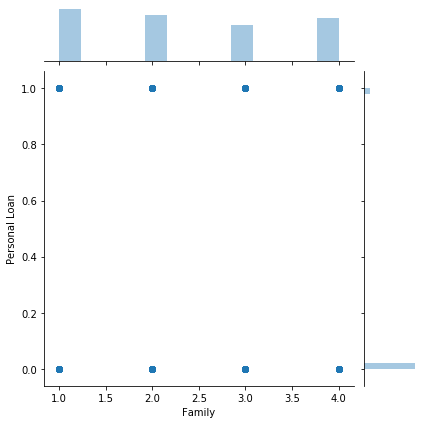

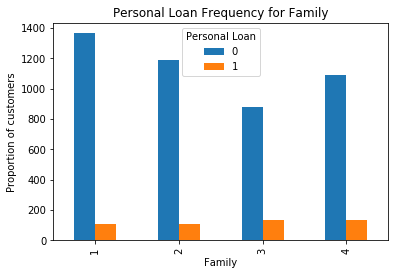

In [10]:
## Analysis of Family
sns.jointplot(y="Personal Loan", x='Family', data=pl_df);
pd.crosstab(pl_df['Family'],pl_df['Personal Loan']).plot(kind='bar')
plt.title('Personal Loan Frequency for Family')
plt.xlabel('Family')
plt.ylabel('Proportion of customers')
## Family size may not be a good predictor, as the size of the family is not defining the personal loan conversion from the graph

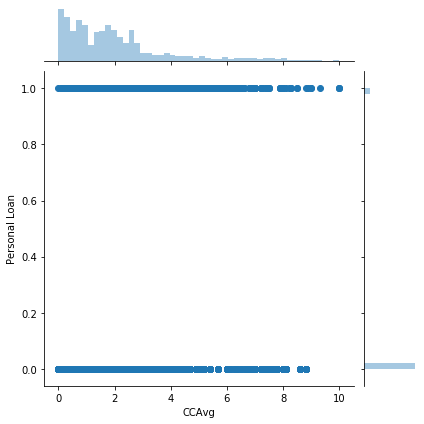

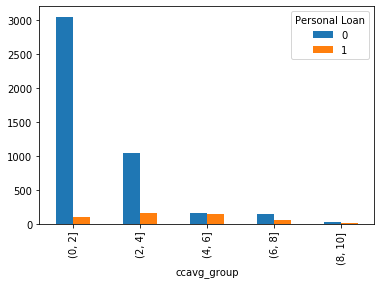

In [11]:
## Analysis of CCAvg
sns.jointplot(y="Personal Loan", x='CCAvg', data=pl_df);
df_ccavg = pl_df.copy(deep=True)
df['ccavg_group'] = pd.cut(x=pl_df['CCAvg'],bins=[0,2,4,6,8,10])
pd.crosstab(df['ccavg_group'],df['Personal Loan']).plot(kind='bar')
##CCAvg is a good predictor as the credit card spending is more the more they buy personal loan

Text(0, 0.5, 'Proportion of customers')

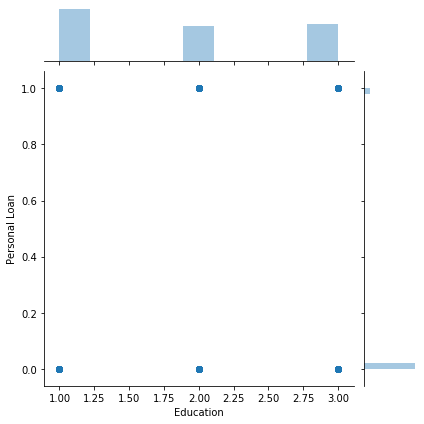

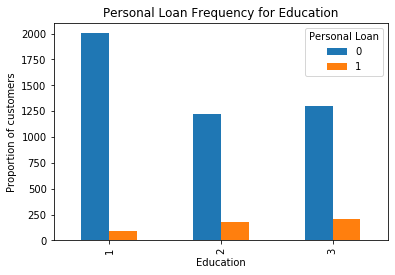

In [12]:
## Analysis of education column
sns.jointplot(y="Personal Loan", x='Education', data=pl_df);
pd.crosstab(pl_df['Education'],pl_df['Personal Loan']).plot(kind='bar')
plt.title('Personal Loan Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
##observations
# 1. seems like education is a good predictor for taking personal loan
# 2. Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# 3. People who are Graduates and Advanced/Professional tend to buy personal loan than people who are undergrad

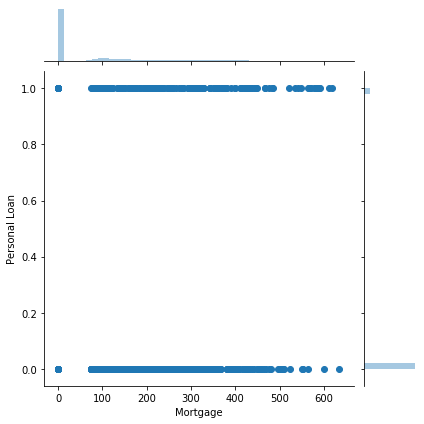

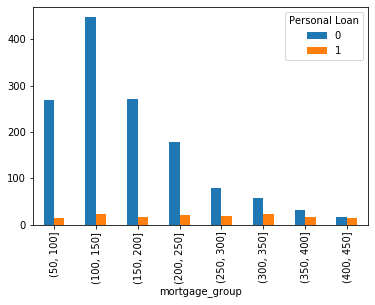

In [13]:
## Analysis of Mortgage
sns.jointplot(y="Personal Loan", x='Mortgage', data=pl_df);
df_mortgage = pl_df.copy(deep=True)
df['mortgage_group'] = pd.cut(x=pl_df['Mortgage'],bins=[0,50,100,150,200,250,300,350,400,450])
pd.crosstab(df['mortgage_group'],df['Personal Loan']).plot(kind='bar')
##Mortgage is good predictor as higher the mortage value more they buy personal loan

Text(0, 0.5, 'Proportion of customers')

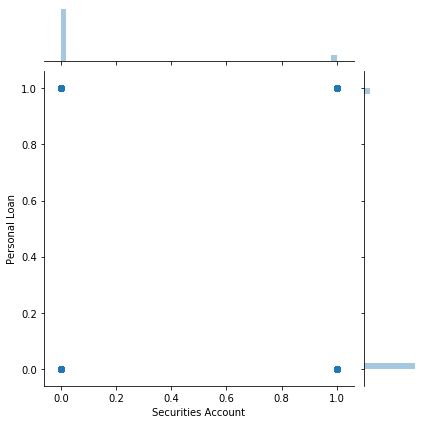

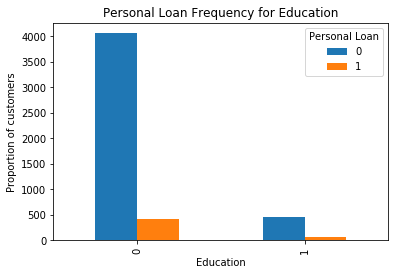

In [14]:
##Analysis of securities account
sns.jointplot(y="Personal Loan", x='Securities Account', data=pl_df);
pd.crosstab(pl_df['Securities Account'],pl_df['Personal Loan']).plot(kind='bar')
plt.title('Personal Loan Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
##cannot clearly say if people having securities account buy personal loan or not

Text(0, 0.5, 'Proportion of customers')

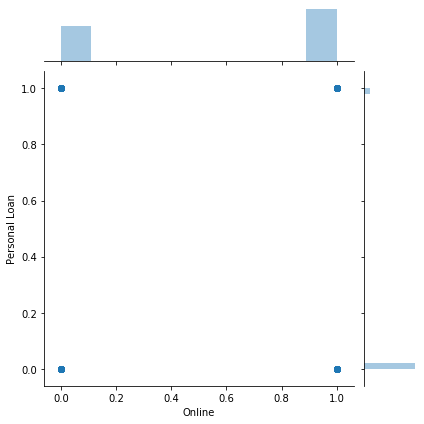

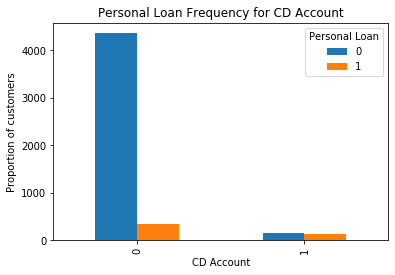

In [15]:
##Analysis of CD Account
sns.jointplot(y="Personal Loan", x='Online', data=pl_df);
pd.crosstab(pl_df['CD Account'],pl_df['Personal Loan']).plot(kind='bar')
plt.title('Personal Loan Frequency for CD Account')
plt.xlabel('CD Account')
plt.ylabel('Proportion of customers')
##CD Account is a good predictor as most of the people who have CD account tend to take personal loan

Text(0, 0.5, 'Proportion of customers')

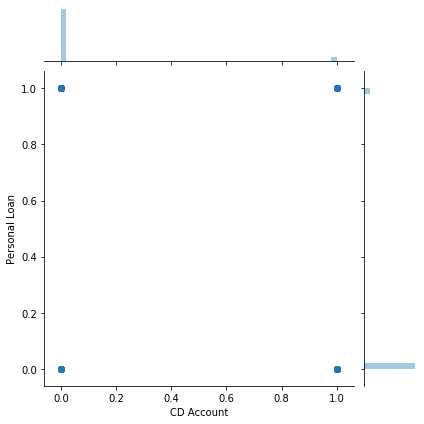

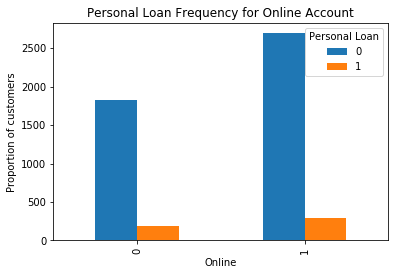

In [16]:
##Analysis of Online
sns.jointplot(y="Personal Loan", x='CD Account', data=pl_df);
pd.crosstab(pl_df['Online'],pl_df['Personal Loan']).plot(kind='bar')
plt.title('Personal Loan Frequency for Online Account')
plt.xlabel('Online')
plt.ylabel('Proportion of customers')
##Online account is a good predictor, if people have online account they tend to take personal loan more from the same bank

Text(0, 0.5, 'Proportion of customers')

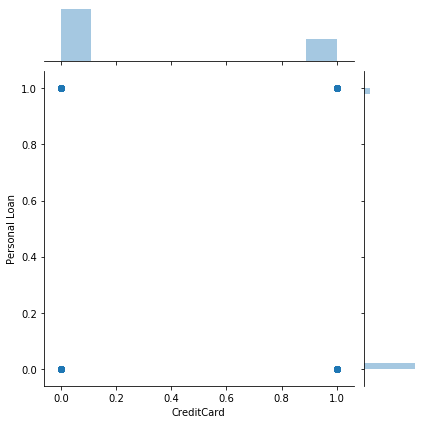

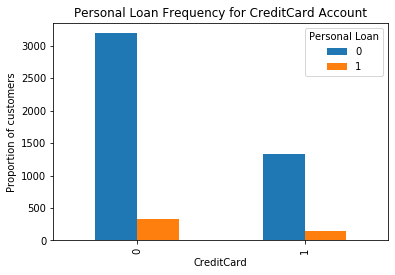

In [17]:
##Analysis of creditcard
sns.jointplot(y="Personal Loan", x='CreditCard', data=pl_df);
pd.crosstab(pl_df['CreditCard'],pl_df['Personal Loan']).plot(kind='bar')
plt.title('Personal Loan Frequency for CreditCard Account')
plt.xlabel('CreditCard')
plt.ylabel('Proportion of customers')
##creditcard account is a good predictor

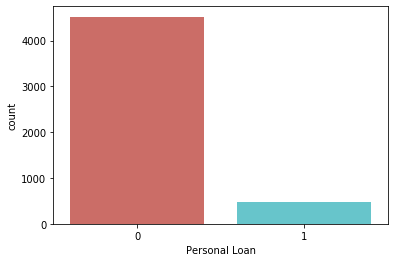

percentage of people rejected the personal loan 90.4
percentage of people bought the personal loan 9.6


In [18]:
##Analysis of Personal Loan (target column)
sns.countplot(x='Personal Loan',data=pl_df, palette='hls')
plt.show()
rejected_loan = len(pl_df[pl_df['Personal Loan']==0])
accepted_loan = len(pl_df[pl_df['Personal Loan']==1])
pct_rejected_loan = rejected_loan/(rejected_loan+accepted_loan)
print("percentage of people rejected the personal loan", pct_rejected_loan*100)
pct_accepted_load = accepted_loan/(rejected_loan+accepted_loan)
print("percentage of people bought the personal loan", pct_accepted_load*100)

### Observations
#### 1. ID, Age, Experience, Family the mean of these are almost the same for taking ot not taking personal loan
#### 2. People taking personal loan have higher income
#### 3. zipcode makes no impact on taking personal loan
#### 4. People taking personal have on an avg higher credit card spends
#### 5. People taking personal are more educated
#### 6. People taking personal have higher mortgage
#### 7. people having deposit account tend to take personal loan

In [19]:
# g0 = sns.jointplot(y="Personal Loan", x='Income', data=pl_dataset);
# g1 = sns.jointplot(y="Personal Loan", x='Family', data=pl_dataset);

# f = plt.figure()
# for J in [g0, g1]:
#     for A in J.fig.axes:
#         f._axstack.add(f._make_key(A), A)

# plt.show()

In [20]:
#### Question 2 : Get the target column distribution.
pl_df.groupby(["Personal Loan"]).count()
#The ratio is almost 1:10, so the Personal Loan Rejection will be better than Approval.
#Income and CCAvg has skewed data.
# Income mean is 73.774200 where as median is 64.0
# CCAvg mean is 1.937938 where as median is 1.5

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


In [21]:
#### Question 3 : Split the data into training and test set in the ratio of 70:30 respectively
array = pl_df.drop(columns=["Personal Loan"]).values
array_y = pl_df["Personal Loan"].values
X = array[:,1:12] # select all rows and first 8 columns which are the attributes
Y = pl_df["Personal Loan"].values
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X

array([[1, 49, 91107, ..., 0, 0, 0],
       [19, 34, 90089, ..., 0, 0, 0],
       [15, 11, 94720, ..., 0, 0, 0],
       ...,
       [39, 24, 93023, ..., 0, 0, 0],
       [40, 49, 90034, ..., 0, 1, 0],
       [4, 83, 92612, ..., 0, 1, 1]], dtype=object)

In [22]:
#### Question 4 : Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("---------Running Logistic Regression----------")
print("Accuracy is :", model_score)
print("F1 score is: ", metrics.f1_score(y_test, y_predict))
print("confusion metrics is : \n",metrics.confusion_matrix(y_test, y_predict))
print("classification report: \n", metrics.classification_report(y_test, y_predict))


print("---------Running Naive Bayes----------")
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score = model.score(X_test, y_test)
print("Accuracy is :", model_score)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

---------Running Logistic Regression----------
Accuracy is : 0.918
F1 score is:  0.4057971014492754
confusion metrics is : 
 [[1335   27]
 [  96   42]]
classification report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1362
           1       0.61      0.30      0.41       138

    accuracy                           0.92      1500
   macro avg       0.77      0.64      0.68      1500
weighted avg       0.90      0.92      0.91      1500

---------Running Naive Bayes----------
Accuracy is : 0.88
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500

[[1238  124]
 [  56   82]]


/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
#### Removing the ZIP Code and rerunning the values.
array = pl_df.drop(columns=["Personal Loan","ZIP Code"]).values
array_y = pl_df["Personal Loan"].values
X = array[:,1:12] # select all rows and first 8 columns which are the attributes
Y = pl_df["Personal Loan"].values
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("---------Running Logistic Regression----------")
print("Accuracy is :", model_score)
print("F1 score is: ", metrics.f1_score(y_test, y_predict))
print("confusion metrics is : \n",metrics.confusion_matrix(y_test, y_predict))
print("classification report: \n", metrics.classification_report(y_test, y_predict))

print("---------Running Naive Bayes----------")
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score = model.score(X_test, y_test)
print("Accuracy is :", model_score)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

---------Running Logistic Regression----------
Accuracy is : 0.9566666666666667
F1 score is:  0.721030042918455
confusion metrics is : 
 [[1351   11]
 [  54   84]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.88      0.61      0.72       138

    accuracy                           0.96      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500

---------Running Naive Bayes----------
Accuracy is : 0.8793333333333333
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500

[[1237  125]
 [  56   82]]


/Users/ahmedshadab/Documents/machine_learning/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
X_cols = pl_df.drop(columns=['Personal Loan','ZIP Code'], axis = 1)

x_knn = X_cols.values
y_knn = pl_df.loc[:,'Personal Loan']

test_size = .3 # taking 300 training and 95 test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, y_knn, test_size=test_size, random_state=seed)

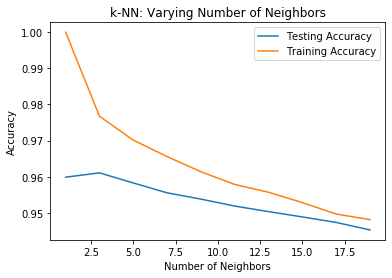

In [25]:
scaler = StandardScaler()  
scaler.fit(X_train_knn)

X_train_knn = scaler.transform(X_train_knn)  
X_test_knn = scaler.transform(X_test_knn) 

neighbors = [1,3,5,7,9,11,13,15,17,19]
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
train_accuracy_values  = []

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(x_knn, y_knn, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
model_knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
model_knn.fit(X_train_knn, y_train_knn) 
y_pred_knn = model_knn.predict(X_test_knn) 
model_knn_score = model_knn.score(X_test_knn, y_test_knn)

print("Accuracy is :", model_knn_score)
print("Precision score is: ", metrics.precision_score(y_test_knn,y_pred_knn))
print("Recall score is: ", metrics.recall_score(y_test_knn,y_pred_knn))
print("F1 score is: ", metrics.f1_score(y_test_knn, y_pred_knn))

print("confusion metrics is : \n",metrics.confusion_matrix(y_test_knn, y_pred_knn))
print("classification report: \n", metrics.classification_report(y_test_knn, y_pred_knn))


Accuracy is : 0.9613333333333334
Precision score is:  0.9347826086956522
Recall score is:  0.6231884057971014
F1 score is:  0.7478260869565218
confusion metrics is : 
 [[1356    6]
 [  52   86]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.93      0.62      0.75       138

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



#### Question 5 : Print the confusion matrix for all the above models (10 points)
#### All the confusion matrix is printed above.

#### Question 6 : Give your reasoning on which is the best model in this case and why it performs better? (10 points)
# Conclusion
#### 1. Logistic Regression and KNN has better Accuracy than Naive Bayes.
#### 2. KNN's accuracy is little more than Logistic Regression and has better Cumulative Accuracy Profile than the other 2 
#### 3. Hence We can conclude that KNN and Logistic regression models is better than Naive Bayes. 
#### 4. Either we can go with KNN or Logistic regression as they perform very similar for the test data.